<a href="https://colab.research.google.com/github/KARTIKPARATKAR/DEEP-LEARNING-WORK/blob/main/Regularization_In_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Regularization:**

When our deep learning model is overfitting which means model is giving better accuracy on training data but worst accuracy in test data, then we can use Regularization to get rid of Overfitting.

**Why overfitting happens in ANN-**

ANN has complex architecture of nodes and layers and this is the most prominant reason why ANN are prone to have overfitting.Complex architecture of neural network tries to capture every small patterns and as a result it learns more on test data and draws a curve which very hardly distinguishes the two type of datapoints. But when unseen data is fed to the model for prediction it gives bad accuracy and this is due to the overfitting problem.

Ways to solve overfitting-

1)Adding more data-Data augmentation,Add more rows

2)Reducing the complexity of model-Dropout,Early Stopping,Regularization.

Regularization- L1, L2 and L3 regularization

**What is Regularization?**

In ANN,we are intended to find out the values of weights and biases and we calculate it by minimizing the loss function. Mean Squared Error is the loss function in case of Regression and Binary Cross Entropy is the loss function in case of Classificaton. Cost function is error function for all the rows of data.

Regularization is used to reduce the overfitting of the model  by adding penalty term in model (lambda).Adding this penalty term makes sure tht our all weights will strt reducing.

We have a loss function and we have to find the parameters values so that the value of this loss function is minimum because it is as optimization problem.As our weight values are coming to be very high which is resulting in overfitting of the model. We want weight values to reduce.We can do this by adding the penalty term in loss function of the model.

**Regularization Implementation For avoiding overfitting of the model in Classification problem-**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
#Storing classification dataset in x and y
x,y = make_moons(100,noise=0.2,random_state = 2)

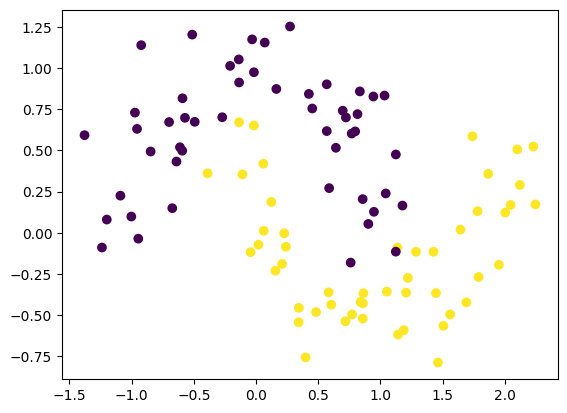

In [5]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0], x[:,1],c=y)
plt.show()

In [7]:
#Defining a model architecture

model = Sequential()
model.add(Dense(128,input_dim=2,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
history1 = model.fit(x,y,epochs=2000,validation_split = 0.2)

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 586ms/step - accuracy: 0.5437 - loss: 0.6524 - val_accuracy: 0.9000 - val_loss: 0.3780
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8188 - loss: 0.4225 - val_accuracy: 0.9000 - val_loss: 0.2390
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8289 - loss: 0.3750 - val_accuracy: 0.9000 - val_loss: 0.1884
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8289 - loss: 0.3767 - val_accuracy: 0.9000 - val_loss: 0.1761
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8844 - loss: 0.2821 - val_accuracy: 0.9000 - val_loss: 0.2215
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8297 - loss: 0.3809 - val_accuracy: 0.9000 - val_loss: 0.2134
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8742 - loss: 0.2618 - val_accuracy: 0.9500 - val_loss: 0.1759
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8289 - loss: 0.3184 - val_accuracy: 0.9500 - 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


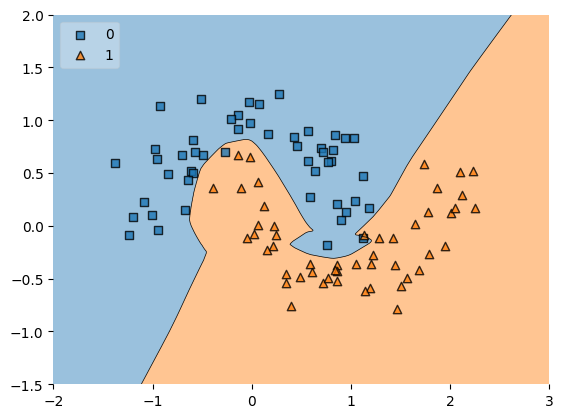

In [10]:
plot_decision_regions(x,y.astype('int'),clf=model,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

The decision boundry that we got above is suggesting that there is overfitting hapening in our model.

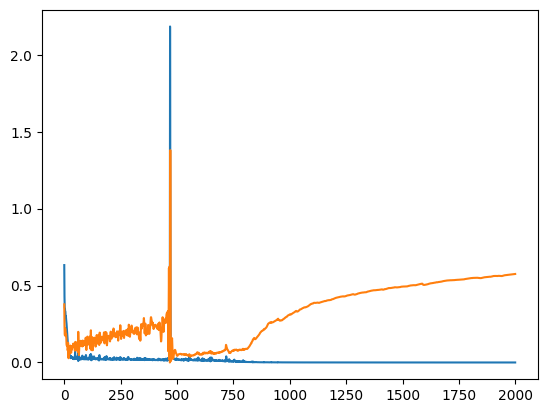

In [12]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
#This curve suggest that overfitting is there in the model because training loss and validation loss curve difference is very high.

Now to overcome this overfitting,we will define the same model with regularization in it and see whether overfitting is overcome or not?

In [13]:
model2 = Sequential()
model2.add(Dense(128,input_dim=2,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.05)))
model2.add(Dense(128,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.05)))
model2.add(Dense(1,activation='sigmoid'))
model2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
history1 = model.fit(x,y,epochs=2000,validation_split = 0.2)

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 389ms/step - accuracy: 0.9898 - loss: 0.0173 - val_accuracy: 0.9500 - val_loss: 0.5546
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9875 - loss: 0.0440 - val_accuracy: 0.9500 - val_loss: 0.3598
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9820 - loss: 0.0288 - val_accuracy: 0.9500 - val_loss: 0.1508
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 0.9500 - val_loss: 0.1353
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9937 - loss: 0.0535 - val_accuracy: 0.9500 - val_loss: 0.2443
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9937 - loss: 0.0078 - val_accuracy: 0.9500 - val_loss: 0.3642
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.9500 - val_loss: 0.4186
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9820 - loss: 0.0323 - val_accuracy: 0.9500 - 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


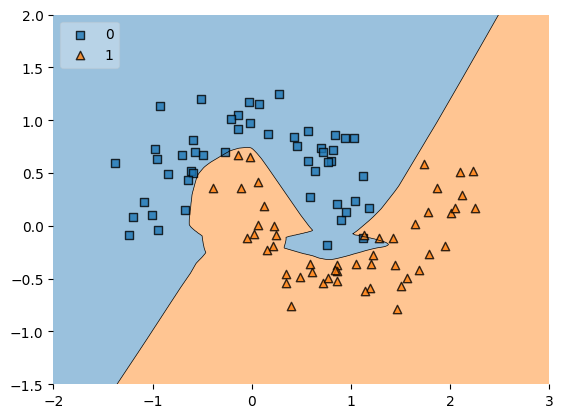

In [15]:
plot_decision_regions(x,y.astype('int'),clf=model,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

This above model will work better on unknown data and as a result we will have a reduced overfitting.

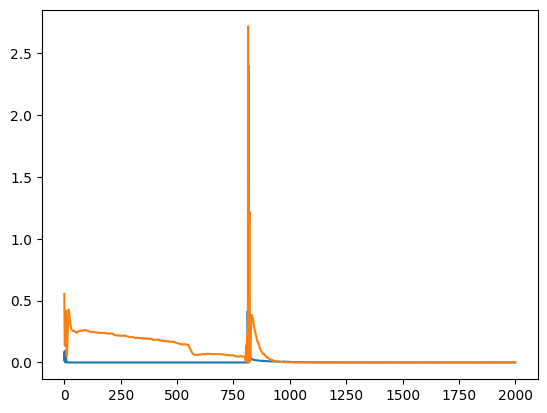

In [16]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

Here note that over a pereoid of 2000 epochs, validation and test accuracy have nearly same value which suggest we have overcome the overfitting issue in a model that we came across before.

In [18]:
model.get_weights()[0].shape #This is the shape of input weights as 2,128 because we have 2 units in input layer and 128 units in hidden layer.

(2, 128)

In [21]:
#We will reshape the number of weights to 256
model_weight_layer1 = model.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

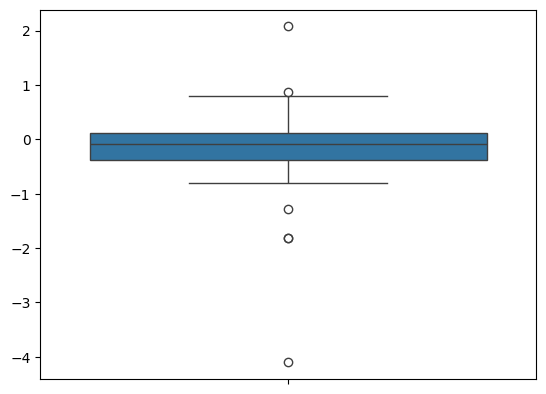

In [22]:
sns.boxplot(model_weight_layer1)

<Axes: >

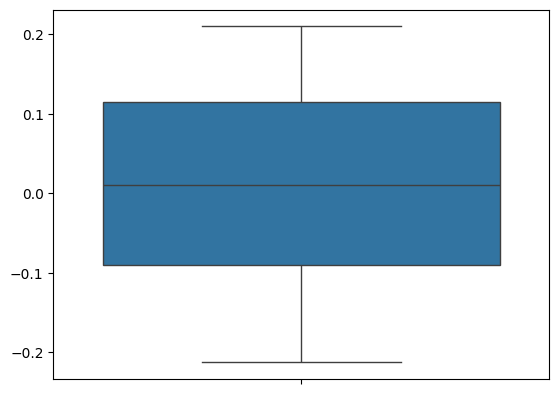

In [23]:
sns.boxplot(model2_weight_layer1)

In [24]:
model_weight_layer1.max()

np.float32(2.077102)

In [25]:
model_weight_layer1.min()

np.float32(-4.103932)

In [26]:
model2_weight_layer1.max()

np.float32(0.21005283)

In [27]:
model2_weight_layer1.min()

np.float32(-0.21271291)

The thing to obseve in above findings of max and min values in both the models 'model' and 'model2' is that we got the range of values decreased in model2 because we had used regularization in model2.

<ipython-input-28-ecf76e75242d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model_weight_layer1)
<ipython-input-28-ecf76e75242d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


<Axes: ylabel='Density'>

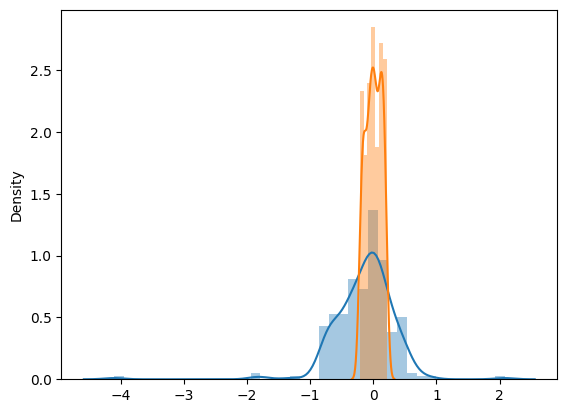

In [28]:
sns.distplot(model_weight_layer1)
sns.distplot(model2_weight_layer1)

Blue is without regularization. Orange is with regularization. It indicates that when we used the regularization, value density is more near 0 and when we didnt use regularization the value distribution is away from 0 which means the range of value is more ..

**NOTE:**

If yu want to use the L1 regularization in this problem then you just have to define the l1 instead of l2.